In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
df=pd.read_csv('Data file.csv')

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.shape

(209593, 37)

In [5]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [6]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
pd.options.display.max_columns = None
df.describe(include='all')

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,47819I90840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,104797.000000,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,60504.431823,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,1.000000,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,52399.000000,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,104797.000000,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,157195.000000,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


#### Observations:
- We can see there are extreme outliers present in the dataset.
- The dataset contains 209593 rows and 37 columns.
- There are only 3 categorical columns present in the dataset with most having int or float as datatype saved in 64 bit format.
- We can drop the 'unnamed' column directly as it's just the index and 'pcircle' which consists of only a singler unique value, which will not help our models gain any useful information.

In [8]:
for col in df.columns:
    if df[col].dtype == "float64":
        df[col]=df[col].astype(np.float32)

In [9]:
for col in df.columns:
    if df[col].dtype == "int64":
        df[col]=df[col].astype(np.int32)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int32  
 1   label                 209593 non-null  int32  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float32
 4   daily_decr30          209593 non-null  float32
 5   daily_decr90          209593 non-null  float32
 6   rental30              209593 non-null  float32
 7   rental90              209593 non-null  float32
 8   last_rech_date_ma     209593 non-null  float32
 9   last_rech_date_da     209593 non-null  float32
 10  last_rech_amt_ma      209593 non-null  int32  
 11  cnt_ma_rech30         209593 non-null  int32  
 12  fr_ma_rech30          209593 non-null  float32
 13  sumamnt_ma_rech30     209593 non-null  float32
 14  medianamnt_ma_rech30  209593 non-null  float32
 15  

We can see that we have reduced our data storage by almost 50% , just by converting the datatype from 64 bit to 32bit, which will make it easier for the system to run quickly on a large dataset such as this.

In [11]:
df.describe(include='all')

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,47819I90840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,104797.000000,0.875177,NaN,8112.731445,5380.549805,6081.250488,2692.550293,3483.344971,3753.253906,3712.166504,2064.452797,3.978057,3735.174316,7700.956055,1811.200195,3850.812012,6.31543,7.716780,12396.218352,1862.958740,92.024734,262.572235,3749.482178,0.041495,0.045712,2.758981,17.952021,275.192688,0.054029,18.520927,23.645398,6.703134,0.046077,3.398803,4.321470,NaN,NaN
std,60504.431823,0.330519,NaN,75714.648438,9220.528320,10918.942383,4308.637695,5770.283203,53840.421875,53315.218750,2370.786034,4.256090,53587.769531,10139.692383,2070.588379,53944.671875,7.19347,12.590251,16857.793882,2081.841064,369.159271,4182.908203,53819.644531,0.397556,0.951386,2.554502,17.379741,4243.895996,0.218060,224.742844,26.469861,2.103864,0.200520,8.819244,10.306154,NaN,NaN
min,1.000000,0.000000,NaN,-48.000000,-93.012665,-93.012665,-23737.140625,-24720.580078,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,52399.000000,1.000000,NaN,246.000000,42.439999,42.692001,280.420013,300.260010,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,104797.000000,1.000000,NaN,527.000000,1469.175659,1500.000000,1083.569946,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900002,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,157195.000000,1.000000,NaN,982.000000,7244.000000,7802.790039,3356.939941,4201.790039,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.309998,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


In [12]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

No Null values are present in the dataset!

We can drop "pcircle","index" and "msidsn"(as the columns comprises of 90% unique values which is not useful for the model) features 

In [13]:
df.drop(["pcircle","Unnamed: 0","msisdn"],axis=1,inplace=True)
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pdate'],
      dtype='object')

In [14]:
#extracting Date into more usable format
df.pdate=pd.to_datetime(df['pdate'])
df['pday']=df['pdate'].dt.day
df['pmonth']=df['pdate'].dt.month
df['pyear']=df['pdate'].dt.year
## Now we can drop Date , we already have extracted the info from it
df.drop(["pdate"], axis = 1, inplace = True)

In [15]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth,pyear
0,0,272.0,3055.050049,3065.149902,220.130005,260.130005,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.500000,2,21,3078,1539.0,7.500000,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7,2016
1,1,712.0,12122.000000,12124.750000,3691.260010,3691.260010,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.040001,1,0,5787,5787.0,61.040001,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8,2016
2,1,535.0,1398.000000,1398.000000,900.130005,900.130005,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.320000,1,0,1539,1539.0,66.320000,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8,2016
3,1,241.0,21.228001,21.228001,159.419998,159.419998,41.0,0.0,947,0,0.0,0.0,0.0,0.000000,1,0,947,947.0,2.500000,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6,2016
4,1,947.0,150.619339,150.619339,1098.900024,1098.900024,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.000000,8,2,23496,2888.0,35.000000,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6,2016


In [16]:
df["pyear"].value_counts()

2016    209593
Name: pyear, dtype: int64

In [17]:
df.drop(["pyear"],axis=1,inplace=True)

In [18]:
len(df.columns)

35

- label:	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- msisdn:	mobile number of user
- aon:	age on cellular network in days
- daily_decr30:	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90:	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30:	Average main account balance over last 30 days
- rental90:	Average main account balance over last 90 days
- last_rech_date_ma:	Number of days till last recharge of main account
- last_rech_date_da:	Number of days till last recharge of data account
- last_rech_amt_ma:	Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30:	Number of times main account got recharged in last 30 days
- fr_ma_rech30:	Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30:	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30:	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30:	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90:	Number of times main account got recharged in last 90 days
- fr_ma_rech90:	Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90:	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90:	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90:	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30:	Number of times data account got recharged in last 30 days
- fr_da_rech30:	Frequency of data account recharged in last 30 days
- cnt_da_rech90:	Number of times data account got recharged in last 90 days
- fr_da_rech90:	Frequency of data account recharged in last 90 days
- cnt_loans30:	Number of loans taken by user in last 30 days
- amnt_loans30:	Total amount of loans taken by user in last 30 days
- maxamnt_loans30:	maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30:	Median of amounts of loan taken by the user in last 30 days
- cnt_loans90:	Number of loans taken by user in last 90 days
- amnt_loans90:	Total amount of loans taken by user in last 90 days
- maxamnt_loans90:	maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90:	Median of amounts of loan taken by the user in last 90 days
- payback30:	Average payback time in days over last 30 days
- payback90:	Average payback time in days over last 90 days
- pcircle:	telecom circle
- pdate:	date


Lets first check the distribution in the target column

Value count: 
  1    183431
0     26162
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='Count'>

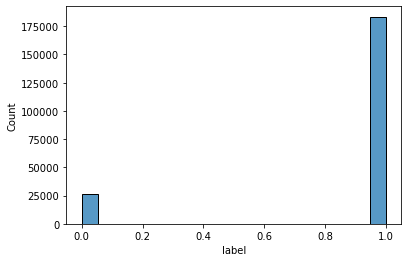

In [19]:
print("Value count: \n ",df["label"].value_counts())
sns.histplot(df["label"])

As we can see above the classes are imbalanced and we will have to use class balancing techniques to create an accurate model.

Text(0.5, 1.0, 'label')

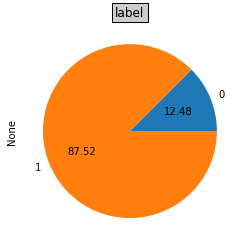

In [20]:
df.groupby('label').size().plot(kind='pie', autopct='%.2f')
plt.title("label",bbox={'facecolor':'0.8', 'pad':3})

## Outliers:

array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'aon'}>,
        <AxesSubplot:title={'center':'daily_decr30'}>,
        <AxesSubplot:title={'center':'daily_decr90'}>,
        <AxesSubplot:title={'center':'rental30'}>,
        <AxesSubplot:title={'center':'rental90'}>],
       [<AxesSubplot:title={'center':'last_rech_date_ma'}>,
        <AxesSubplot:title={'center':'last_rech_date_da'}>,
        <AxesSubplot:title={'center':'last_rech_amt_ma'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'fr_ma_rech30'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech30'}>],
       [<AxesSubplot:title={'center':'medianamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianmarechprebal30'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'fr_ma_rech90'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'mediana

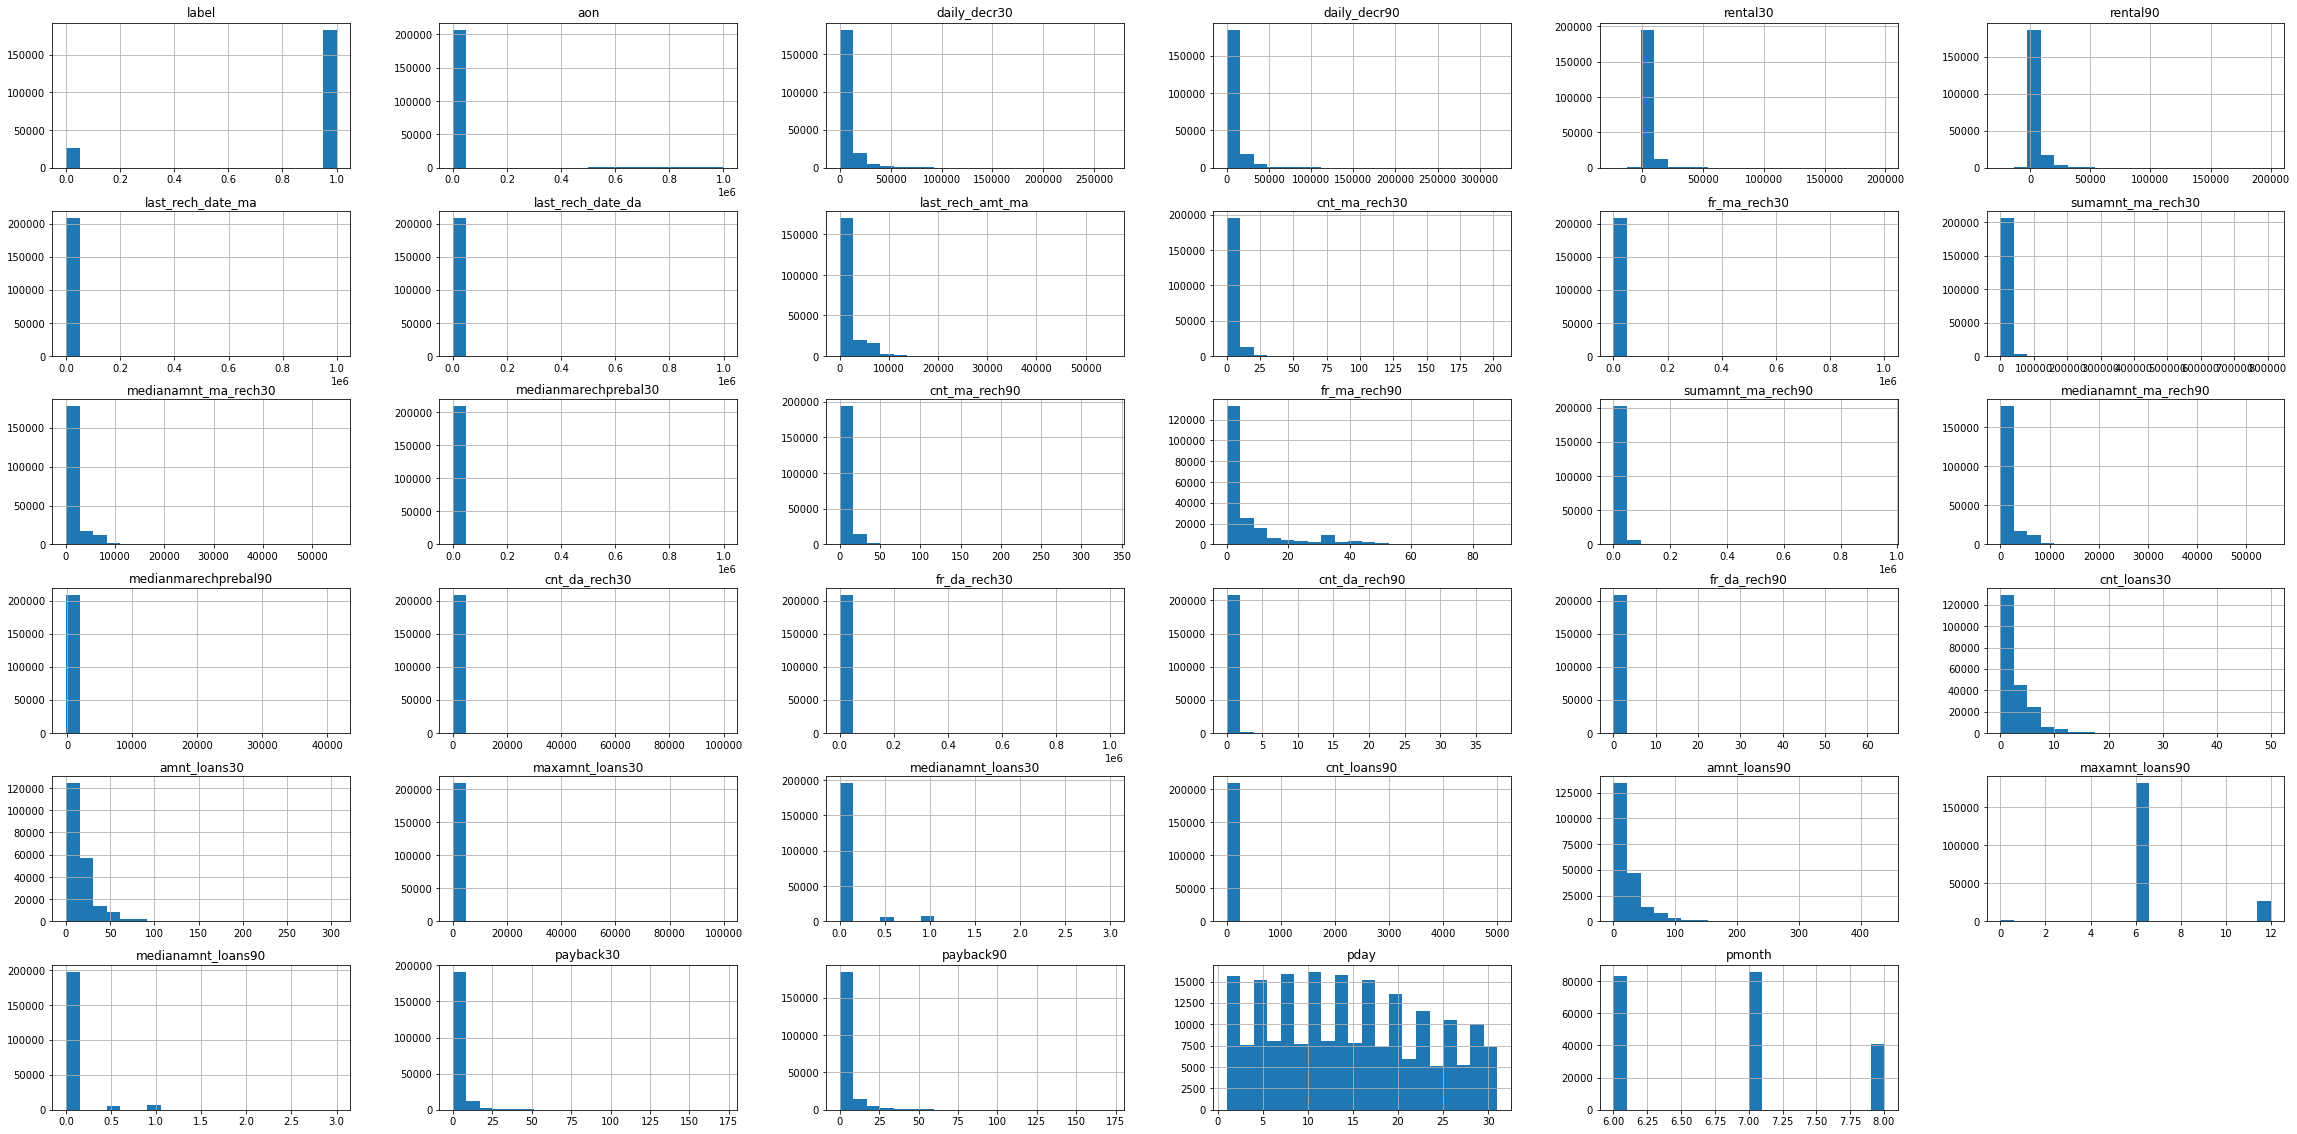

In [21]:
df.hist(figsize=(40,20),bins=20)

We can see that skewness is present in some columns.

Removing Outliers:

In [22]:
z=np.abs(zscore(df))
threshold=5
df_new=df[(z<5).all(axis=1)]

print("samples before applying zscore: ",len(df))
print("samples after applying zscore: ",len(df_new))

samples before applying zscore:  209593
samples after applying zscore:  190496


### Data Loss:

In [23]:
(209593-190496)/(209593) *100

9.111468417361266

Data Loss around 10% is an acceptable limit as it will reduce the outliers and improve the model. We performed this step here, before EDA to positively reduce the size and help us run the code quickly.

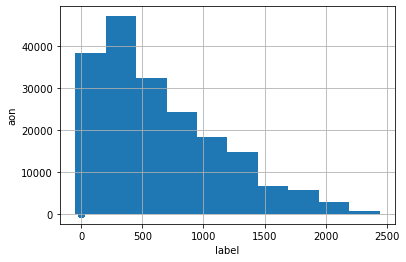

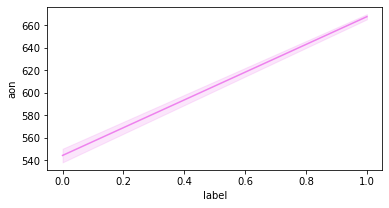

<AxesSubplot:xlabel='label', ylabel='aon'>

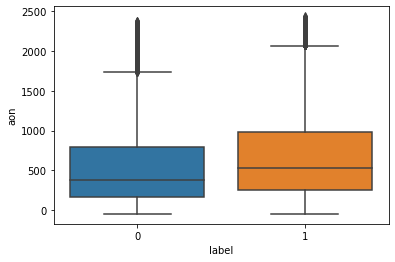

In [24]:
# age on cellular network in days

x=df_new['label']
y=df_new['aon']

y.hist()

#scatter plot
plt.scatter(x,y)
plt.xlabel('label')
plt.ylabel('aon')
plt.show()

plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="aon",data=df_new, color='violet')
plt.show()

#boxplot
sns.boxplot(x,y,data=df_new)

<AxesSubplot:>

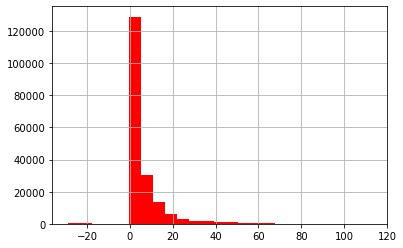

In [25]:
df_new["last_rech_date_ma"].hist(color="red",bins=25)

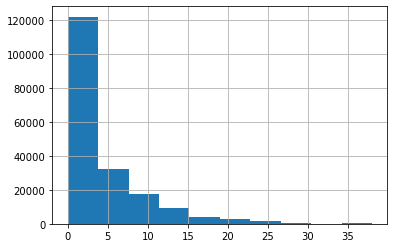

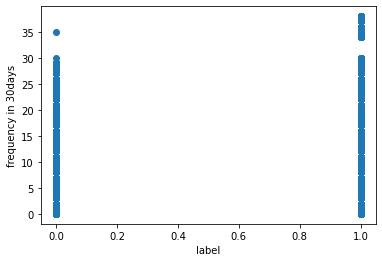

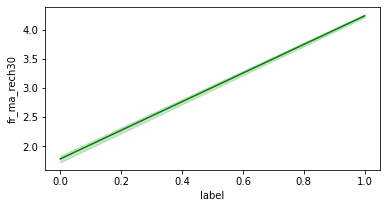

<AxesSubplot:xlabel='label', ylabel='fr_ma_rech30'>

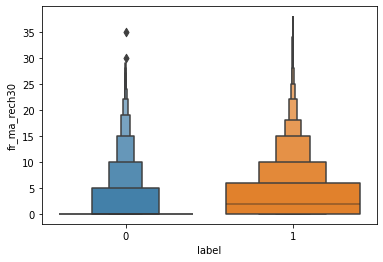

In [26]:
#
x=df_new['label']
y=df_new['fr_ma_rech30']

y.hist()
plt.show()

#scatter plot
plt.scatter(x,y)
plt.xlabel('label')
plt.ylabel('frequency in 30days')
plt.show()

plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="fr_ma_rech30",data=df_new, color='green')
plt.show()

sns.boxenplot(x,y,data=df_new)

#### Number of times main account got recharged in last 30 days

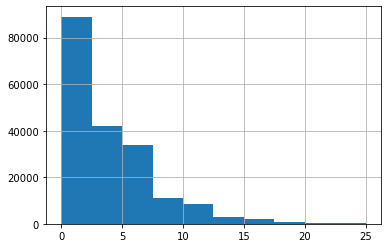

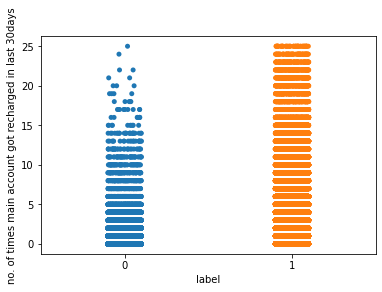

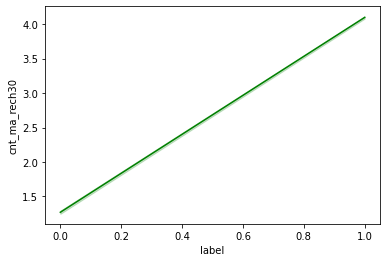

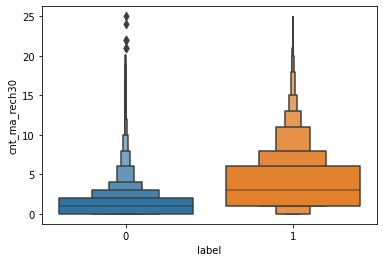

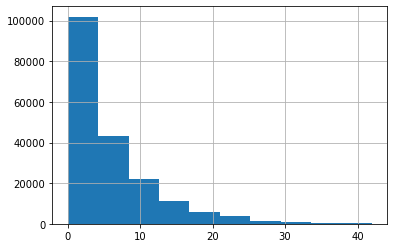

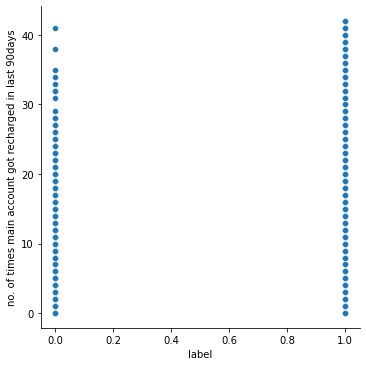

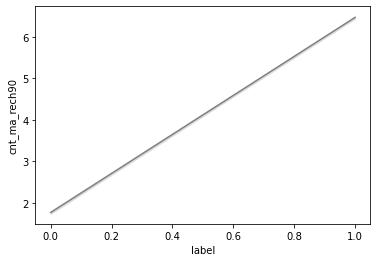

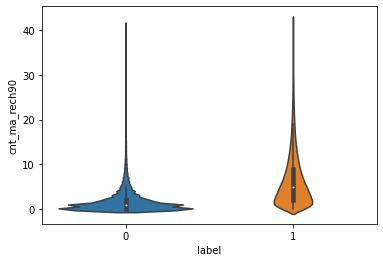

In [27]:
#Number of times main account got recharged in last 30 days vs label

x=df_new['label']
y=df_new['cnt_ma_rech30']

y.hist()
plt.show()

#scatter plot
sns.stripplot(x,y)
plt.xlabel('label')
plt.ylabel('no. of times main account got recharged in last 30days')
plt.show()


sns.lineplot(x="label",y="cnt_ma_rech30",data=df_new, color='green')
plt.show()

sns.boxenplot(x,y,data=df_new)
plt.show()
# Number of times main account got recharged in last 90 days vs label

x=df_new['label']
y=df_new['cnt_ma_rech90']

y.hist()
plt.show()

#scatter plot
sns.relplot(x,y)
plt.xlabel('label')
plt.ylabel('no. of times main account got recharged in last 90days')
plt.show()


sns.lineplot(x="label",y="cnt_ma_rech90",data=df_new, color='grey')
plt.show()

sns.violinplot(x,y,data=df_new)
plt.show()



Observations:
- People who have recharged more than 18 times in last 30 days have not defaulted at all meaning they have more recharging potential, hence will less likely to default on a micro loan.
- Maximum number of recharges were done below 5.(1 to 4 to be exact)
- Customers who did not default were also the ones who recharged their account the most number of times. 
- People with low default rate were recharging their account atleast 5 times in 90 days.


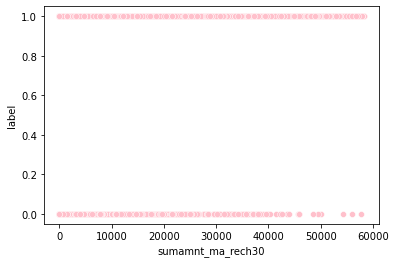

<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='label'>

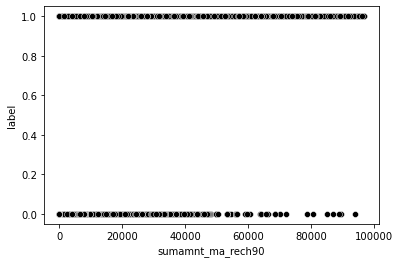

In [28]:
#total amount recharged in last 30days and 90days and label relation
sns.scatterplot(x="sumamnt_ma_rech30",y="label",data=df_new,color="pink")
plt.show()
sns.scatterplot(x="sumamnt_ma_rech90",y="label",data=df_new,color="black")

0.0       26192
1539.0     8307
770.0      5538
Name: sumamnt_ma_rech30, dtype: int64 

0       19768
1539     5283
773      3939
Name: sumamnt_ma_rech90, dtype: int64 



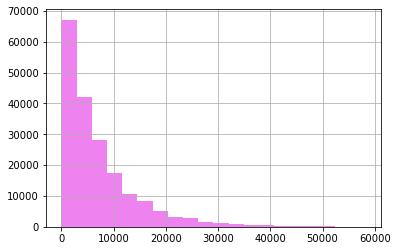

<AxesSubplot:>

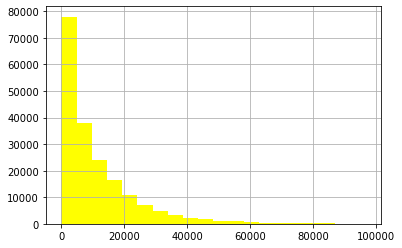

In [29]:
print(df_new["sumamnt_ma_rech30"].value_counts().nlargest(3),"\n")
print(df_new["sumamnt_ma_rech90"].value_counts().nlargest(3),"\n")
df_new["sumamnt_ma_rech30"].hist(bins=20,color="violet")
plt.show()
df_new["sumamnt_ma_rech90"].hist(bins=20,color="yellow")


Observations:
- Maximum recharges were done with 0 IDR in the last 30 days. After that 1539 was the most common recharge amount in mainaccount.
-  Defaulting becomes less when the recharging amount crosses 45k IDR, meaning people with higher recharges were less likely to default on a micro loan.
- Maximum number of recharges were of amount amount below 10k IDR
- The defaulting decreases when recharging amount is above 50k in the last 90days.


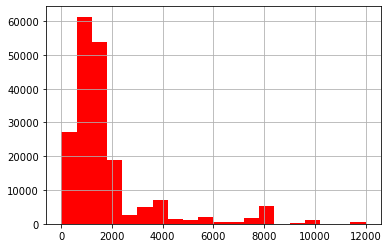

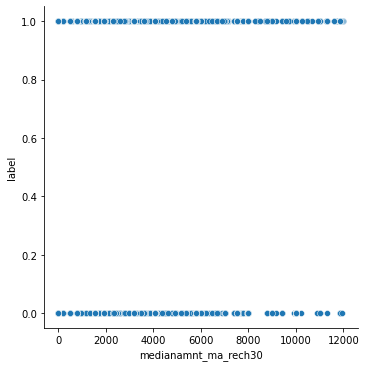

In [30]:
# Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah) and label
df_new["medianamnt_ma_rech30"].hist(bins=20,color="red")
plt.show()
sns.relplot(data=df_new,x="medianamnt_ma_rech30",y="label")


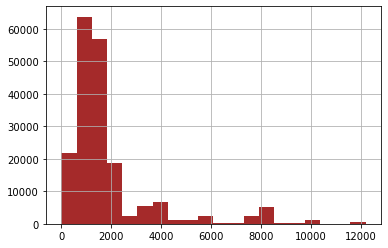

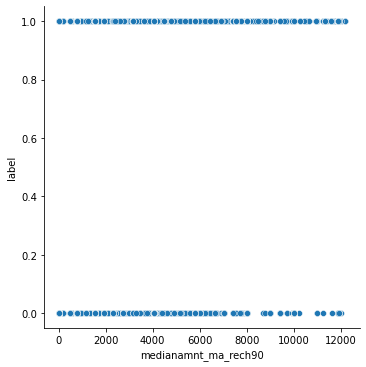

In [31]:
# Median of amount of recharges done in main account over last 90 days at user level (in Indonesian Rupiah) and label
df_new["medianamnt_ma_rech90"].hist(bins=20,color="brown")
plt.show()
sns.relplot(data=df_new,x="medianamnt_ma_rech90",y="label")

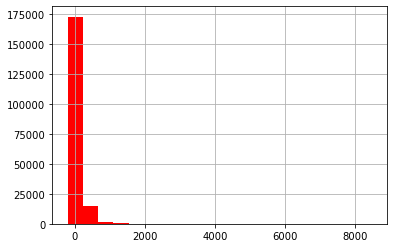

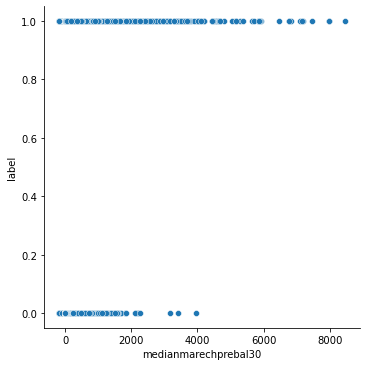

In [32]:
# Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah) and label
df_new["medianmarechprebal30"].hist(bins=20,color="red")
plt.show()
sns.relplot(data=df_new,x="medianmarechprebal30",y="label")

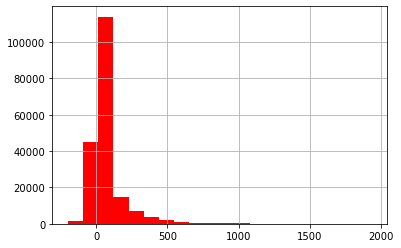

<AxesSubplot:xlabel='medianmarechprebal90', ylabel='label'>

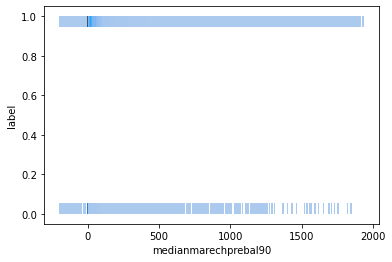

In [33]:
# Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah) and label
df_new["medianmarechprebal90"].hist(bins=20,color="red")
plt.show()
sns.histplot(data=df_new,x="medianmarechprebal90",y="label")

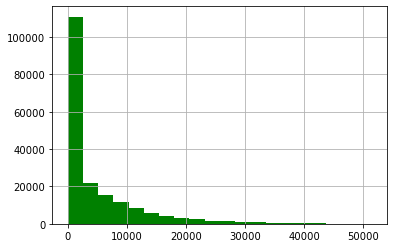

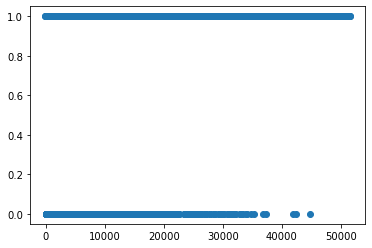

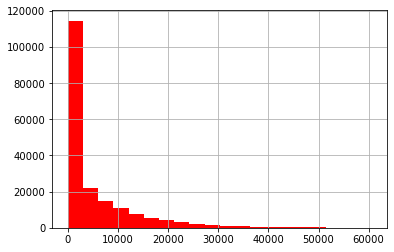

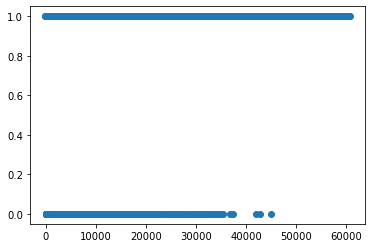

In [34]:
#Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) vs label
df_new["daily_decr30"].hist(color="green",bins=20)
plt.show()
plt.scatter(x=df_new["daily_decr30"],y=df_new["label"])
plt.show()
#Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) vs label
df_new["daily_decr90"].hist(color="red",bins=20)
plt.show()
plt.scatter(x=df_new["daily_decr90"],y=df_new["label"])
plt.show()

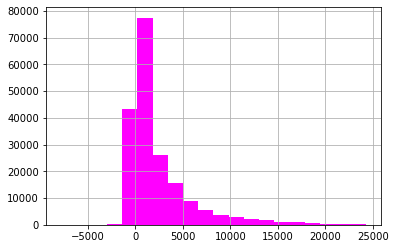

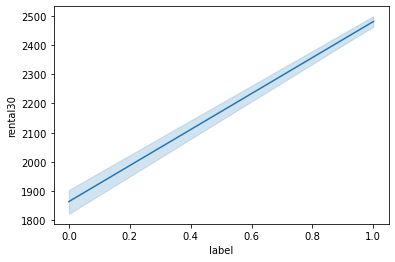

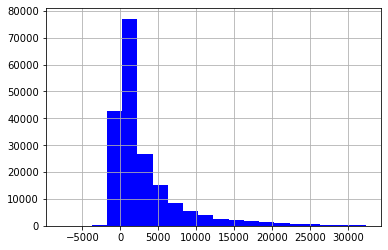

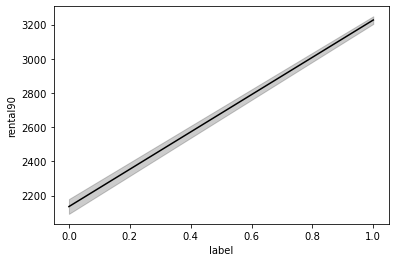

In [35]:
# Average main account balance over last 30 days vs label
df_new["rental30"].hist(color="magenta",bins=20)
plt.show()
sns.lineplot(y=df_new["rental30"],x=df_new["label"])
plt.show()

# Average main account balance over last 90 days vs label
df_new["rental90"].hist(color="blue",bins=20)
plt.show()
sns.lineplot(y=df_new["rental90"],x=df_new["label"],color="black")
plt.show()

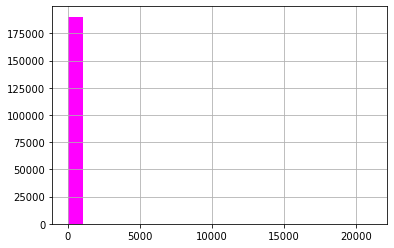

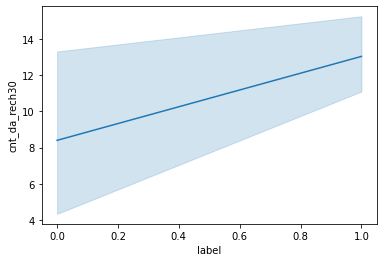

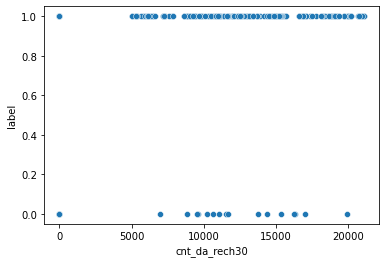

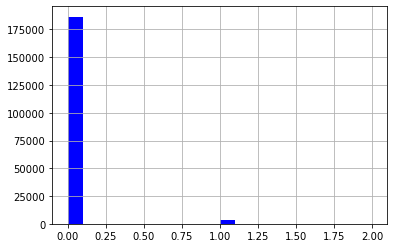

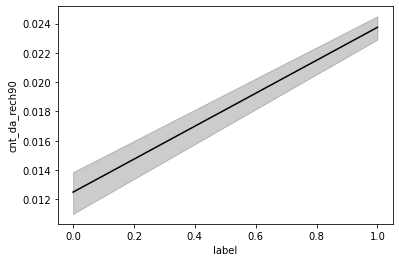

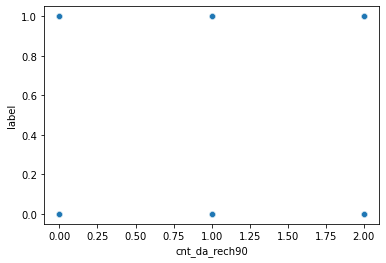

In [36]:
# Number of times DATA account got recharged in last 30 days vs label
df_new["cnt_da_rech30"].hist(color="magenta",bins=20)
plt.show()
sns.lineplot(y=df_new["cnt_da_rech30"],x=df_new["label"])
plt.show()
sns.scatterplot(data=df_new,x="cnt_da_rech30",y="label")
plt.show()
# Number of times DATA account got recharged in last 90 days vs label
df_new["cnt_da_rech90"].hist(color="blue",bins=20)
plt.show()
sns.lineplot(y=df_new["cnt_da_rech90"],x=df_new["label"],color="black")
plt.show()
sns.scatterplot(data=df_new,x="cnt_da_rech90",y="label")
plt.show()

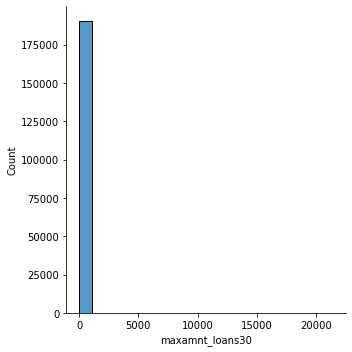

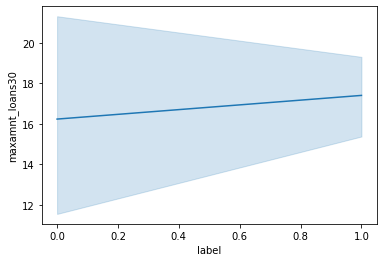

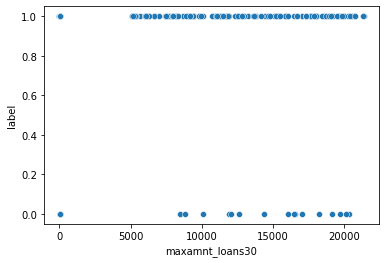

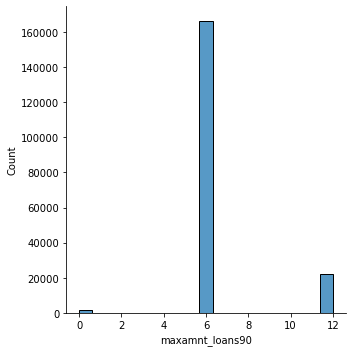

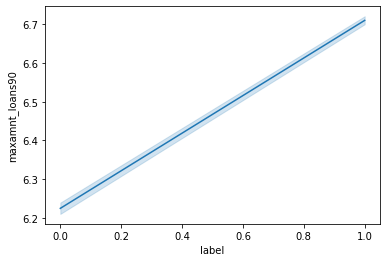

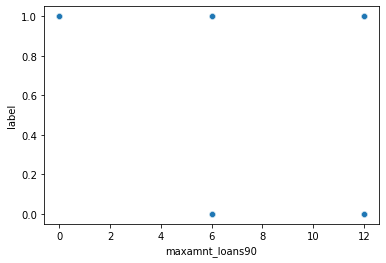

In [37]:
# maximum amount of loan taken by the user in last 30 days vs label
sns.displot(data=df_new,x="maxamnt_loans30")
plt.show()
sns.lineplot(y=df_new["maxamnt_loans30"],x=df_new["label"])
plt.show()
sns.scatterplot(data=df_new,x="maxamnt_loans30",y="label")
plt.show()

# maximum amount of loan taken by the user in last 90 days vs label
sns.displot(data=df_new,x="maxamnt_loans90")
plt.show()
sns.lineplot(y=df_new["maxamnt_loans90"],x=df_new["label"])
plt.show()
sns.scatterplot(data=df_new,x="maxamnt_loans90",y="label")
plt.show()

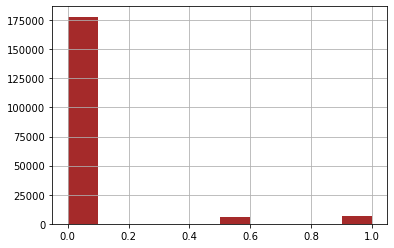

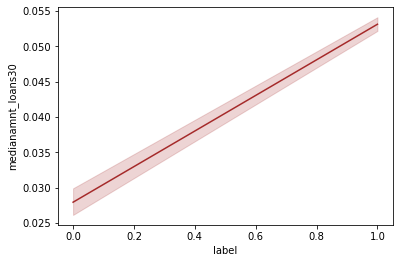

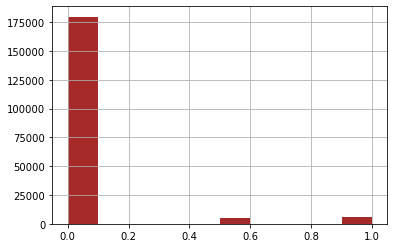

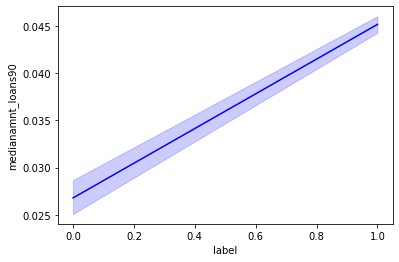

In [38]:
# Median of amounts of loan taken by the user in last 30 days vs label
df_new["medianamnt_loans30"].hist(color='brown')
plt.show()
sns.lineplot(x="label",y="medianamnt_loans30",data=df_new, color='brown')
plt.show()
# Median of amounts of loan taken by the user in last 90 days vs label
df_new["medianamnt_loans90"].hist(color='brown')
plt.show()
sns.lineplot(x="label",y="medianamnt_loans90",data=df_new, color='blue')
plt.show()

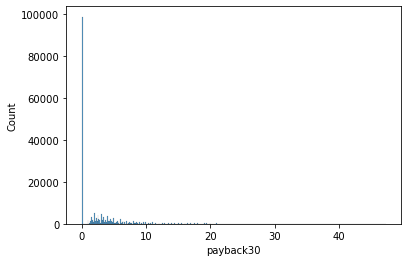

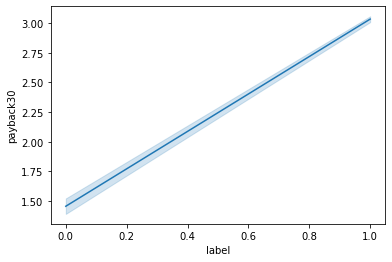

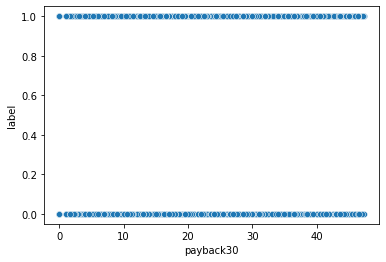

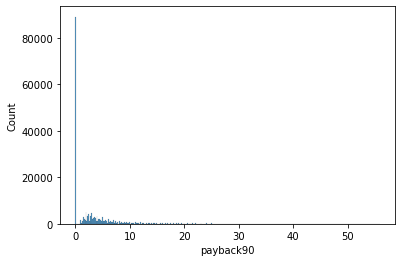

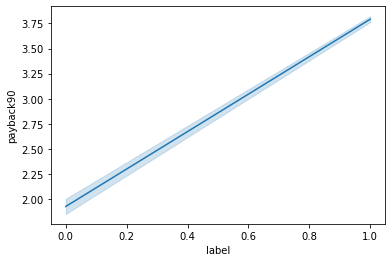

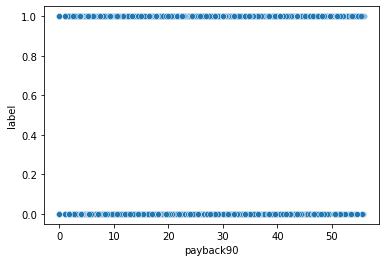

In [39]:
#Average payback time in days over last 30 days vs label

sns.histplot(data=df_new,x="payback30")
plt.show()
sns.lineplot(y=df_new["payback30"],x=df_new["label"])
plt.show()
sns.scatterplot(data=df_new,x="payback30",y="label")
plt.show()


# Average payback time in days over last 90 days vs label

sns.histplot(data=df_new,x="payback90")
plt.show()
sns.lineplot(y=df_new["payback90"],x=df_new["label"])
plt.show()
sns.scatterplot(data=df_new,x="payback90",y="label")
plt.show()


## Data Transformation:

### Splitting the dataset:

In [40]:
x=df_new.drop(["label"],axis=1)
y=df_new["label"]

In [41]:
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
0,272.0,3055.050049,3065.149902,220.130005,260.130005,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.500000,2,21,3078,1539.0,7.500000,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,712.0,12122.000000,12124.750000,3691.260010,3691.260010,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.040001,1,0,5787,5787.0,61.040001,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,535.0,1398.000000,1398.000000,900.130005,900.130005,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.320000,1,0,1539,1539.0,66.320000,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,241.0,21.228001,21.228001,159.419998,159.419998,41.0,0.0,947,0,0.0,0.0,0.0,0.000000,1,0,947,947.0,2.500000,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,947.0,150.619339,150.619339,1098.900024,1098.900024,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.000000,8,2,23496,2888.0,35.000000,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


### Scaling:

In [42]:
sc=StandardScaler()
x_sc = sc.fit_transform(x)

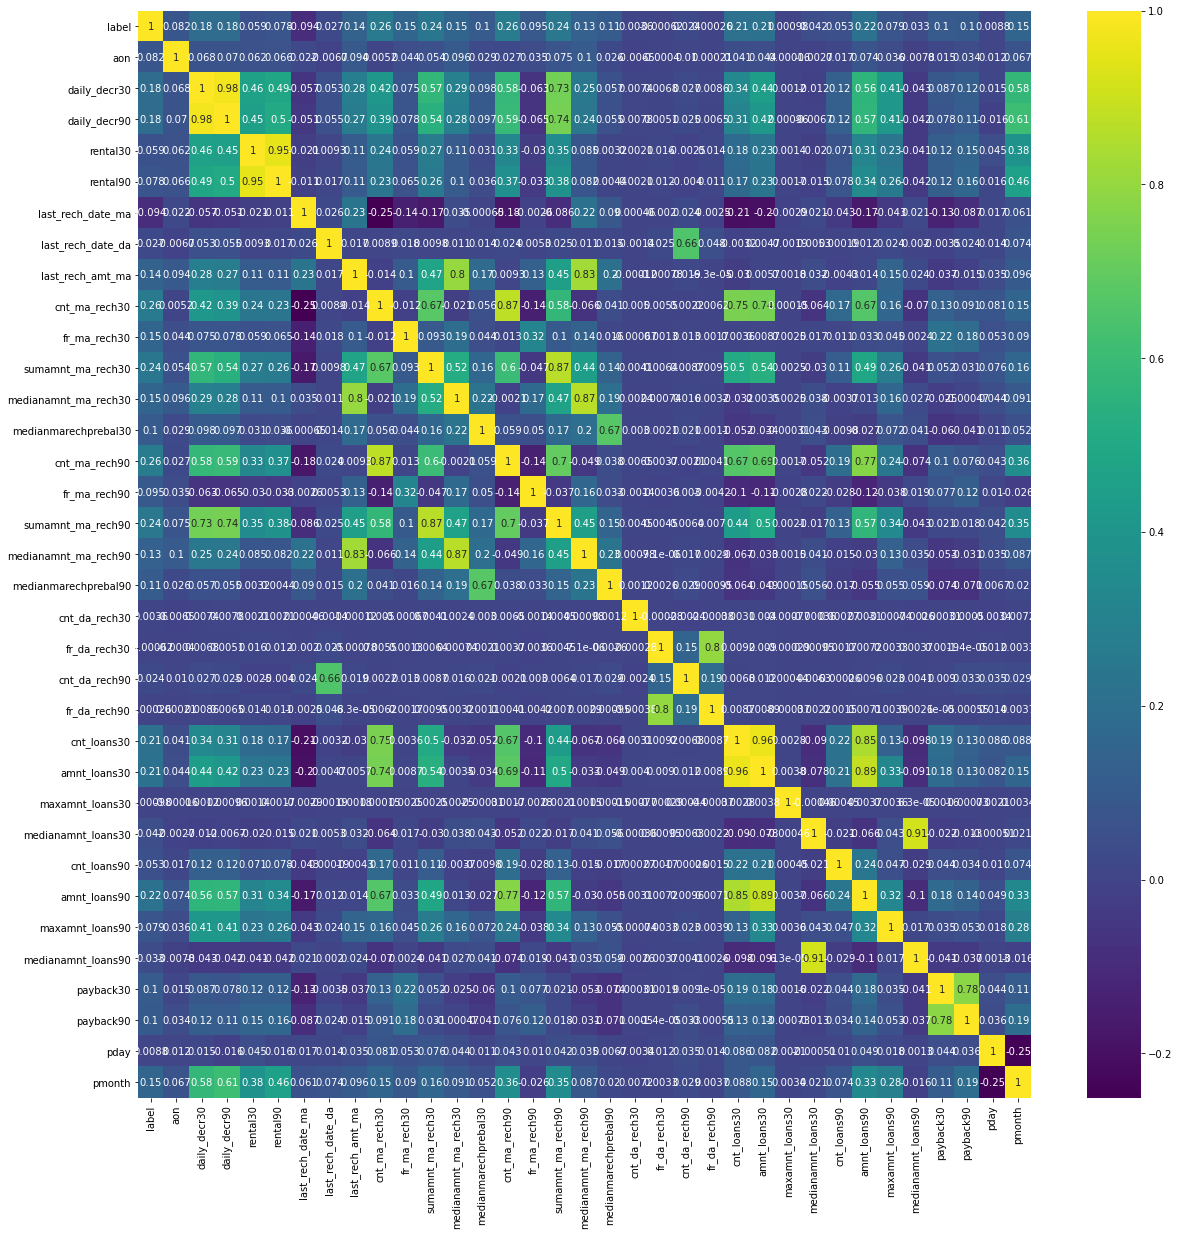

In [43]:
plt.figure(figsize = (20,20))
sns.heatmap(df_new.corr(), annot = True, cmap = "viridis")
plt.show()

In [44]:
# VIF

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif=pd.DataFrame()
vif["score"]=[variance_inflation_factor(x_sc,i) for i in range(x_sc.shape[1])]
vif["feature_name"]=x.columns
vif

,score,feature_name
0,1.026207,aon
1,28.953100,daily_decr30
2,32.236387,daily_decr90
3,12.473268,rental30
4,13.604925,rental90
5,1.396792,last_rech_date_ma
6,1.793589,last_rech_date_da
7,3.857579,last_rech_amt_ma
8,14.562905,cnt_ma_rech30
9,1.236613,fr_ma_rech30


In [45]:
#understanding the relationship between independent variable with label
data_corr=df_new.corr()
data_corr["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech90           0.262444
cnt_ma_rech30           0.261083
sumamnt_ma_rech90       0.242900
sumamnt_ma_rech30       0.241703
amnt_loans90            0.218130
amnt_loans30            0.214882
cnt_loans30             0.210366
daily_decr30            0.184935
daily_decr90            0.184336
medianamnt_ma_rech30    0.153960
pmonth                  0.150822
fr_ma_rech30            0.149656
last_rech_amt_ma        0.144375
medianamnt_ma_rech90    0.134174
medianmarechprebal90    0.106312
medianmarechprebal30    0.102885
payback30               0.101958
payback90               0.100380
fr_ma_rech90            0.095142
aon                     0.082315
maxamnt_loans90         0.079325
rental90                0.078302
rental30                0.058698
cnt_loans90             0.053177
medianamnt_loans30      0.042073
medianamnt_loans90      0.033031
last_rech_date_da       0.026681
cnt_da_rech90           0.024018
pday                    0.008796
cnt_da_rec

We can drop columns which have a very low absolute correlation score. and drop them. and redefine x and y. Also, as we can see that collinearity in some features is very high, we'll drop these along with the above columns. Then we can check the vif again.

In [46]:
df_new.drop(["pday","cnt_da_rech30","maxamnt_loans30","fr_da_rech90","fr_da_rech30","cnt_loans30","daily_decr90"],inplace=True,axis=1)

In [47]:
x = df_new.drop(["label"],axis=1)

In [48]:
x_sc = sc.fit_transform(x)

#### Rechecking VIF:

In [49]:
# VIF

vif=pd.DataFrame()
vif["score"]=[variance_inflation_factor(x_sc,i) for i in range(x_sc.shape[1])]
vif["feature_name"]=x.columns
vif

,score,feature_name
0,1.025287,aon
1,3.305395,daily_decr30
2,11.584772,rental30
3,12.614033,rental90
4,1.385702,last_rech_date_ma
5,1.773316,last_rech_date_da
6,3.856453,last_rech_amt_ma
7,14.267476,cnt_ma_rech30
8,1.229817,fr_ma_rech30
9,11.396080,sumamnt_ma_rech30


We have greatly reduced the multicollinearity.

### Checking Skewness:

In [50]:
x.skew().sort_values(ascending=False)

cnt_loans90             71.590332
medianmarechprebal30    10.719225
last_rech_date_da        9.986228
cnt_da_rech90            7.439889
medianmarechprebal90     4.848900
medianamnt_loans90       4.454560
medianamnt_loans30       4.077140
payback30                3.661866
payback90                3.402786
last_rech_date_ma        3.091235
rental90                 2.608359
rental30                 2.477727
medianamnt_ma_rech90     2.460280
medianamnt_ma_rech30     2.442765
daily_decr30             2.285489
last_rech_amt_ma         2.219151
fr_ma_rech90             2.176993
sumamnt_ma_rech90        2.161715
amnt_loans90             2.125957
sumamnt_ma_rech30        2.070696
fr_ma_rech30             2.005131
amnt_loans30             1.886464
cnt_ma_rech90            1.798712
maxamnt_loans90          1.766907
cnt_ma_rech30            1.653280
aon                      0.948834
pmonth                   0.380514
dtype: float64

We can see almost all columns are skewed. We can use power transform to attempt skewness removal.


In [51]:
x_temp=power_transform(x_sc)

x_new=pd.DataFrame(x_temp,columns=x.columns)

x_new.skew()

aon                      0.154754
daily_decr30             0.511526
rental30                 0.144589
rental90                 0.278072
last_rech_date_ma       -1.582799
last_rech_date_da      -46.856522
last_rech_amt_ma         0.074921
cnt_ma_rech30            0.152295
fr_ma_rech30             0.401427
sumamnt_ma_rech30        0.206651
medianamnt_ma_rech30     0.023955
medianmarechprebal30    -0.905028
cnt_ma_rech90            0.189812
fr_ma_rech90             0.566525
sumamnt_ma_rech90        0.242484
medianamnt_ma_rech90     0.007257
medianmarechprebal90    -1.075165
cnt_da_rech90            6.672889
amnt_loans30             0.238806
medianamnt_loans30       3.514291
cnt_loans90              0.385918
amnt_loans90             0.317227
maxamnt_loans90         -1.698107
medianamnt_loans90       3.851405
payback30                0.498051
payback90                0.440127
pmonth                   0.142363
dtype: float64

In [52]:
df_new.columns

Index(['label', 'aon', 'daily_decr30', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech90', 'amnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90', 'pmonth'],
      dtype='object')

In [53]:
x_new.describe()

,aon,daily_decr30,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pmonth
count,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05,1.904960e+05
mean,5.978429e-17,-1.463957e-16,-2.438381e-16,7.429442e-17,-1.454324e-15,8.091188e-16,5.742346e-16,-9.822565e-16,-5.357504e-16,-4.424346e-16,1.099080e-16,5.527069e-16,-1.113986e-15,4.605675e-16,3.852467e-16,-9.893187e-16,2.668951e-16,-4.138524e-15,-7.791307e-17,1.982703e-15,-3.554260e-16,-4.753069e-16,8.524221e-16,6.672814e-15,1.775153e-15,1.139346e-15,-1.077797e-15
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.021114e+00,-9.841550e-01,-2.108852e+01,-1.513169e+01,-9.021718e+00,-1.644782e+02,-1.829345e+00,-1.515824e+00,-1.025101e+00,-1.418530e+00,-1.736907e+00,-7.885782e+00,-1.516795e+00,-1.013594e+00,-1.414169e+00,-1.894923e+00,-8.037223e+00,-1.466389e-01,-2.245704e+00,-2.646279e-01,-1.962780e+00,-1.997553e+00,-6.668019e+00,-2.441679e-01,-8.871523e-01,-9.520868e-01,-1.102940e+00
25%,-8.917854e-01,-9.411920e-01,-8.738470e-01,-8.934607e-01,-5.570644e-01,-1.127432e-01,-6.676848e-01,-8.937077e-01,-1.025101e+00,-8.903773e-01,-5.407226e-01,-6.362798e-01,-7.059701e-01,-1.013594e+00,-8.971959e-01,-6.162333e-01,-5.820551e-01,-1.466389e-01,-1.003918e+00,-2.646279e-01,-1.020968e+00,-1.066730e+00,-2.146015e-01,-2.441679e-01,-8.871523e-01,-9.520868e-01,-1.102940e+00
50%,-4.819876e-02,-3.802794e-01,-2.253289e-01,-2.330381e-01,-2.239765e-01,-1.127432e-01,1.593941e-01,7.940448e-02,-6.297033e-02,-4.352072e-02,2.884892e-01,-2.255216e-01,-6.191024e-02,-3.801302e-01,-6.414049e-02,2.576500e-01,-1.948912e-01,-1.466389e-01,-8.550369e-02,-2.646279e-01,-2.952660e-01,-3.298306e-01,-2.146015e-01,-2.441679e-01,-8.871523e-01,-1.135660e-01,4.136794e-01
75%,8.337762e-01,9.647441e-01,8.324525e-01,8.483927e-01,3.368765e-01,-1.127432e-01,6.952348e-01,7.036188e-01,9.458192e-01,7.809063e-01,5.788320e-01,4.386700e-01,7.626259e-01,8.996224e-01,8.270431e-01,5.634257e-01,4.184337e-01,-1.466389e-01,9.226173e-01,-2.646279e-01,9.662335e-01,9.018192e-01,-2.146015e-01,-2.441679e-01,9.111454e-01,8.601308e-01,4.136794e-01
max,2.258309e+00,2.057778e+00,2.180414e+00,2.136334e+00,4.949453e+00,6.472449e+00,2.202849e+00,2.653174e+00,2.163543e+00,2.540716e+00,2.369874e+00,3.330892e+00,2.521514e+00,1.953983e+00,2.429995e+00,2.350777e+00,3.330143e+00,6.819475e+00,2.338073e+00,3.778916e+00,2.163219e+00,2.206688e+00,2.132702e+00,4.095546e+00,2.161465e+00,2.193935e+00,1.529459e+00


The skewness has been greatly reduced.

## Best Random State:

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
for i in range(40,60):
    # setting up testing and training sets
    X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.25, random_state=i)
    lr = LogisticRegression().fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random State = ",i)
        print("Training r2 score: ",(accuracy_score(y_train,pred_train)*100))
        print("Testing r2 score: ",(accuracy_score(y_test,pred_test)*100))
  

At Random State =  42
Training r2 score:  87.85696287586092
Testing r2 score:  87.9094574164287
At Random State =  46
Training r2 score:  87.90735763480598
Testing r2 score:  87.92625566941038
At Random State =  56
Training r2 score:  87.83456520521867
Testing r2 score:  87.84226440450193


In [56]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.25, random_state=46)
sm = SMOTE(random_state=46)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [57]:
X_train.shape

(249580, 27)

In [58]:
x_new.shape

(190496, 27)

In [59]:
X_test.shape

(47624, 27)

In [60]:
y_train.value_counts()

0    124790
1    124790
Name: label, dtype: int64

X_train shape exceeds x_new's shape because we have used SMOTE to resample X_train which has created synthetic values in it as it upsampled the minority class in y_train

# Models:

## Model1: Decision Tree Classifier

In [156]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": [5,7,9], 
                  "min_samples_leaf": [10,15,5]}
grid_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
print("Best Parameters for Decision Tree: ", grid_tree.best_params_)
print("Best Score for Decision Tree: ", grid_tree.best_score_)
       

Best Parameters for Decision Tree:  {'min_samples_leaf': 5, 'max_depth': 9, 'criterion': 'gini'}
Best Score for Decision Tree:  0.8437975799342897


In [157]:
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=5).fit(X_train, y_train)
pred_train2 = dec_tree.predict(X_train)
pred_test2 = dec_tree.predict(X_test) 

In [158]:
print(classification_report(y_test,pred_test2))

              precision    recall  f1-score   support

           0       0.42      0.76      0.54      6102
           1       0.96      0.84      0.90     41522

    accuracy                           0.83     47624
   macro avg       0.69      0.80      0.72     47624
weighted avg       0.89      0.83      0.85     47624



<AxesSubplot:title={'center':'Feature Importances of Decision Tree'}, xlabel='Importance'>

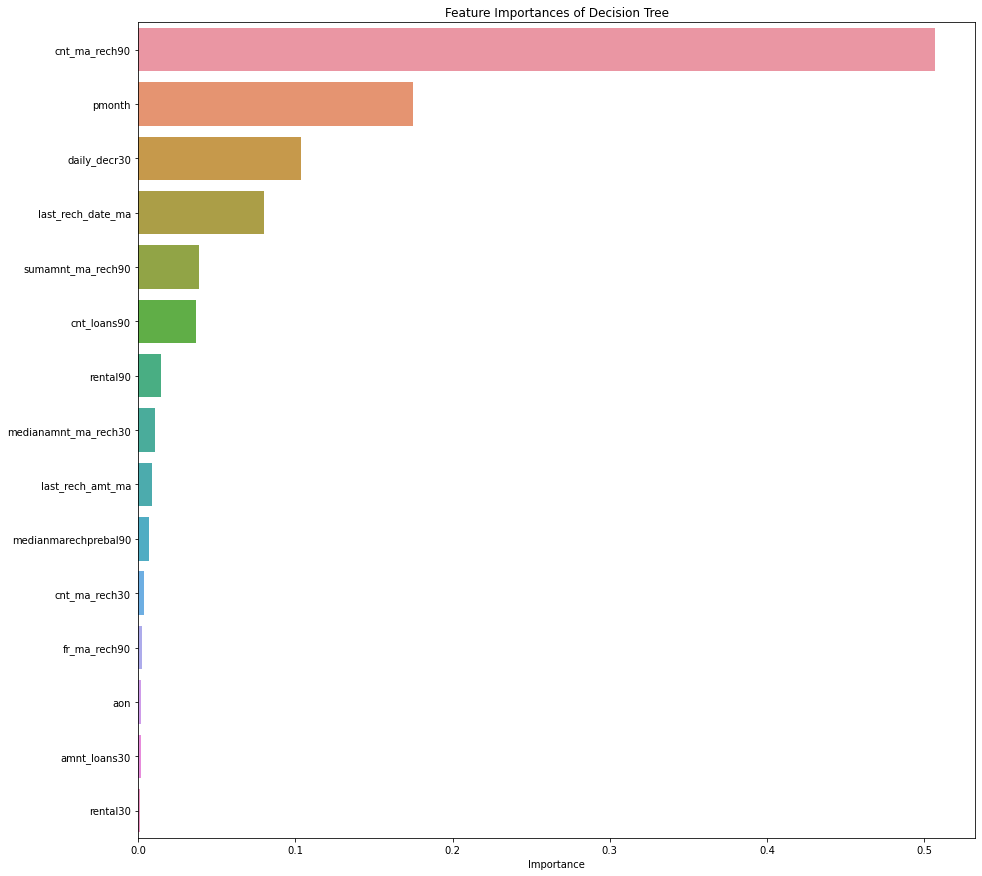

In [161]:
feat=pd.DataFrame({"Importance": tree_clf.feature_importances_}, 
                  index=x_new.columns).sort_values(by="Importance",ascending=False)

plt.figure(figsize=(15,15))
plt.title("Feature Importances of Decision Tree")

sns.barplot(feat["Importance"][0:15],feat.index[0:15])
# top 10 feature importances

In [162]:
pred_dt = dec_tree.predict(X_test)
dts = accuracy_score(y_test,pred_dt)
for k in range(2,10):
    dtscore=cross_val_score(dec_tree,x_new,y,cv=k)
    dtc=dtscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtc*100)
    print("accuracy score is : ",dts*100)
    print("\n")

At cv=  2
Cross Val score :  91.16621871325383
accuracy score is :  83.40962539895851


At cv=  3
Cross Val score :  91.21766319442905
accuracy score is :  83.40962539895851


At cv=  4
Cross Val score :  91.22763732571812
accuracy score is :  83.40962539895851


At cv=  5
Cross Val score :  91.26805793085413
accuracy score is :  83.40962539895851


At cv=  6
Cross Val score :  91.28538271277935
accuracy score is :  83.40962539895851


At cv=  7
Cross Val score :  91.23131116127264
accuracy score is :  83.40962539895851


At cv=  8
Cross Val score :  91.28538132034268
accuracy score is :  83.40962539895851


At cv=  9
Cross Val score :  91.27593264412543
accuracy score is :  83.40962539895851




At cv=  4
- Cross Val score :  91.22763732571812
- accuracy score is :  83.40962539895851

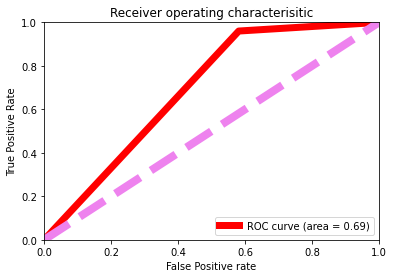

In [163]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_dt,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## Model 2: Random Forest Classifier

In [63]:
forest_params = {"max_depth": [3,5],"min_samples_leaf": [3,5]}
rand_forest = RandomizedSearchCV(RandomForestClassifier(), forest_params)
rand_forest.fit(X_train, y_train)
# forest best estimator
forest_clf = rand_forest.best_estimator_
print("Best Parameters for Random Forest: ", rand_forest.best_params_)
print("Best Score for Random Forest: ", rand_forest.best_score_)
print("\n")

KeyboardInterrupt: 

__Hyperparameter tuning takes a lot of time , so used default values for the model. Hence, we cannot calculate feature importances__

In [78]:
rfc = RandomForestClassifier().fit(X_train, y_train)
pred_train3 = rfc.predict(X_train)
pred_test3 = rfc.predict(X_test) 

In [79]:
print(classification_report(y_test,pred_test3))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62      6102
           1       0.94      0.95      0.94     41522

    accuracy                           0.90     47624
   macro avg       0.78      0.78      0.78     47624
weighted avg       0.90      0.90      0.90     47624



In [67]:
pred_rfc = rfc.predict(X_test)
rss = accuracy_score(y_test,pred_rfc)
for k in range(2,6):
    rsscore=cross_val_score(rfc,x_new,y,cv=k)
    rsc=rsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rsc*100)
    print("accuracy score is : ",rss*100)
    print("\n")

At cv=  2
Cross Val score :  91.40191920040316
accuracy score is :  90.21501763816563


At cv=  3
Cross Val score :  91.45336380835319
accuracy score is :  90.21501763816563


At cv=  4
Cross Val score :  91.44286494204603
accuracy score is :  90.21501763816563


At cv=  5
Cross Val score :  91.44024018376216
accuracy score is :  90.21501763816563




At cv=  4 ,

- Cross Val score :  91.44286494204603
- accuracy score is :  90.21501763816563

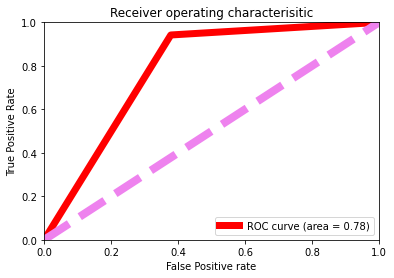

In [69]:
fpr,tpr,thresholds = roc_curve(pred_rfc,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## Model 3: Logistic Regression

In [64]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1,10,0.001]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
print("Best Parameters for Logistic Regression: ", grid_log_reg.best_params_)
print("Best Score for Logistic Regression: ", grid_log_reg.best_score_)
print("------------------------------------------")

Best Parameters for Logistic Regression:  {'C': 10, 'penalty': 'l2'}
Best Score for Logistic Regression:  0.7780791730106579
------------------------------------------


In [65]:
lr = LogisticRegression(solver='liblinear',C=10 , penalty= 'l2').fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
    

In [66]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.32      0.78      0.46      6102
           1       0.96      0.76      0.85     41522

    accuracy                           0.76     47624
   macro avg       0.64      0.77      0.65     47624
weighted avg       0.88      0.76      0.80     47624



In [67]:
pred_lr = lr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for k in range(2,10):
    lsscore=cross_val_score(lr,x_new,y,cv=k)
    lsc=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lsc*100)
    print("accuracy score is : ",lss*100)
    print("\n")

At cv=  2
Cross Val score :  87.87271123803124
accuracy score is :  76.12758273139593


At cv=  3
Cross Val score :  87.88478494035874
accuracy score is :  76.12758273139593


At cv=  4
Cross Val score :  87.85853771207795
accuracy score is :  76.12758273139593


At cv=  5
Cross Val score :  87.86693664984836
accuracy score is :  76.12758273139593


At cv=  6
Cross Val score :  87.87481160668959
accuracy score is :  76.12758273139593


At cv=  7
Cross Val score :  87.86903687864196
accuracy score is :  76.12758273139593


At cv=  8
Cross Val score :  87.87271123803124
accuracy score is :  76.12758273139593


At cv=  9
Cross Val score :  87.87218626314642
accuracy score is :  76.12758273139593




At cv=  4
- Cross Val score :  87.85853771207795
- accuracy score is :  76.12758273139593

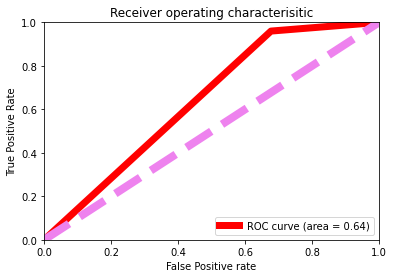

In [68]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## Model 4: Gradient Boosting Classifier

In [69]:
params={'n_estimators':[15, 20,25,100],
           'learning_rate':[0.15, 0.1, 0.25, 0.5],
           'max_features':[1,2,3],
           'max_depth':[2,3,4],
           'random_state':[46]
           }

In [70]:
rand_gbc = RandomizedSearchCV(GradientBoostingClassifier(), params)
rand_gbc.fit(X_train, y_train)
gbc= rand_gbc.best_estimator_
print("Best Parameters for GBC: ", rand_gbc.best_params_)
print("Best Score for GBC: ", rand_gbc.best_score_)
print("------------------------------------------")

Best Parameters for GBC:  {'random_state': 46, 'n_estimators': 100, 'max_features': 3, 'max_depth': 3, 'learning_rate': 0.5}
Best Score for GBC:  0.8982370382242166
------------------------------------------


In [73]:
gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=3, max_features=3,n_estimators=100, random_state=46).fit(X_train, y_train)
pred_train5 = gbc.predict(X_train)
pred_test5 = gbc.predict(X_test)

In [74]:
print(classification_report(y_test,pred_test5))

              precision    recall  f1-score   support

           0       0.50      0.71      0.58      6102
           1       0.95      0.89      0.92     41522

    accuracy                           0.87     47624
   macro avg       0.73      0.80      0.75     47624
weighted avg       0.90      0.87      0.88     47624



In [75]:
gbcs = accuracy_score(y_test,pred_test5)
for k in range(2,10):
    lsscore=cross_val_score(gbc,x_new,y,cv=k)
    lsc=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lsc*100)
    print("accuracy score is : ",gbcs*100)
    print("\n")

At cv=  2
Cross Val score :  91.39666974634638
accuracy score is :  87.05274651436251


At cv=  3
Cross Val score :  91.43866513307225
accuracy score is :  87.05274651436251


At cv=  4
Cross Val score :  91.47173693935832
accuracy score is :  87.05274651436251


At cv=  5
Cross Val score :  91.48171035826748
accuracy score is :  87.05274651436251


At cv=  6
Cross Val score :  91.49903520634993
accuracy score is :  87.05274651436251




KeyboardInterrupt: 

At cv=  2
- Cross Val score :  91.39666974634638
- accuracy score is :  87.05274651436251

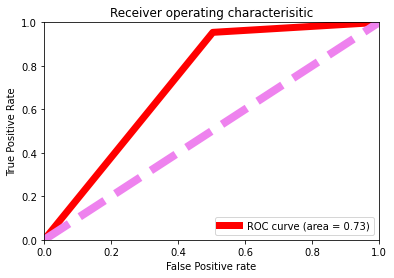

In [76]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test5,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

# Saving the model:

In [80]:
filename = "Micro_credit_loan__pred.pkl"
pickle.dump(rfc,open(filename,'wb'))

# Conclusion:

In [82]:
h = np.array(y_test)
predicted = np.array(rfc.predict(X_test))
df_comp = pd.DataFrame({"original":h, "predicted":predicted},index=range(len(h)))

In [85]:
df_comp.sample(20)

,original,predicted
3477,1,1
31193,1,1
34368,1,1
47264,1,0
31183,1,1
37477,1,0
22782,1,1
45229,1,1
35343,1,1
10615,1,1
